In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high = 180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the lats and longs to a list.
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities=[]
# identify the nearest city for each lat & long combo
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we add it to the list of cities.
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count.
len(cities)

615

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [6]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
    #create endpoint URL with each city.
    city_url = url+"&q="+city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to rcord count.
    record_count+=1
    
# Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | bac lieu
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | bosaso
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | qasigiannguit
Processing Record 11 of Set 1 | san martin
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | sambava
Processing Record 17 of Set 1 | smithers
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | hami
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | new norfolk
Processing Recor

Processing Record 35 of Set 4 | saint-pierre
Processing Record 36 of Set 4 | ponta do sol
Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | wagar
Processing Record 39 of Set 4 | kytmanovo
Processing Record 40 of Set 4 | hihifo
City not found. Skipping...
Processing Record 41 of Set 4 | boa viagem
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | lanja
Processing Record 45 of Set 4 | chara
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | olenegorsk
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | ayagoz
Processing Record 6 of Set 5 | parede
Processing Record 7 of Set 5 | luanda
Processin

Processing Record 22 of Set 8 | englewood
Processing Record 23 of Set 8 | mahebourg
Processing Record 24 of Set 8 | charlestown
Processing Record 25 of Set 8 | kristiansund
Processing Record 26 of Set 8 | airai
Processing Record 27 of Set 8 | kachug
Processing Record 28 of Set 8 | san borja
Processing Record 29 of Set 8 | ternate
Processing Record 30 of Set 8 | babanusah
City not found. Skipping...
Processing Record 31 of Set 8 | san quintin
Processing Record 32 of Set 8 | oktyabrskoye
Processing Record 33 of Set 8 | richards bay
Processing Record 34 of Set 8 | iquitos
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | broome
Processing Record 37 of Set 8 | trelew
Processing Record 38 of Set 8 | camopi
Processing Record 39 of Set 8 | banswara
Processing Record 40 of Set 8 | lansing
Processing Record 41 of Set 8 | rungata
City not found. Skipping...
Processing Record 42 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 43 of Set 8 | bolunga

Processing Record 7 of Set 12 | mikhaylovka
Processing Record 8 of Set 12 | sao joao da barra
Processing Record 9 of Set 12 | orodara
Processing Record 10 of Set 12 | saint-leu
Processing Record 11 of Set 12 | phangnga
Processing Record 12 of Set 12 | kununurra
Processing Record 13 of Set 12 | pundaguitan
Processing Record 14 of Set 12 | naftah
City not found. Skipping...
Processing Record 15 of Set 12 | pinyug
Processing Record 16 of Set 12 | tacna
Processing Record 17 of Set 12 | foki
Processing Record 18 of Set 12 | gat
Processing Record 19 of Set 12 | tigzirt
Processing Record 20 of Set 12 | zhoucheng
Processing Record 21 of Set 12 | nabire
Processing Record 22 of Set 12 | tabou
Processing Record 23 of Set 12 | roebourne
Processing Record 24 of Set 12 | mixtepec
City not found. Skipping...
Processing Record 25 of Set 12 | barcelos
Processing Record 26 of Set 12 | barawe
City not found. Skipping...
Processing Record 27 of Set 12 | la asuncion
Processing Record 28 of Set 12 | yulara


In [7]:
len(city_data)

550

In [8]:
city_data

[{'City': 'Tasiilaq',
  'Lat': 65.6145,
  'Lng': -37.6368,
  'Max Temp': 4.8,
  'Humidity': 62,
  'Cloudiness': 100,
  'Wind Speed': 6.67,
  'Country': 'GL',
  'Date': '2022-01-31 05:33:44'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 70.11,
  'Humidity': 81,
  'Cloudiness': 0,
  'Wind Speed': 1.01,
  'Country': 'ZA',
  'Date': '2022-01-31 05:33:43'},
 {'City': 'Saint-Philippe',
  'Lat': -21.3585,
  'Lng': 55.7679,
  'Max Temp': 83.75,
  'Humidity': 83,
  'Cloudiness': 86,
  'Wind Speed': 13.85,
  'Country': 'RE',
  'Date': '2022-01-31 05:31:50'},
 {'City': 'Bac Lieu',
  'Lat': 9.285,
  'Lng': 105.7244,
  'Max Temp': 85.86,
  'Humidity': 59,
  'Cloudiness': 4,
  'Wind Speed': 18.19,
  'Country': 'VN',
  'Date': '2022-01-31 05:34:28'},
 {'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 79.09,
  'Humidity': 29,
  'Cloudiness': 92,
  'Wind Speed': 17.07,
  'Country': 'AU',
  'Date': '2022-01-31 05:33:40'},
 {'City': 'Punta Arenas',
  'L

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,4.80,62,100,6.67,GL,2022-01-31 05:33:44
1,Cape Town,-33.9258,18.4232,70.11,81,0,1.01,ZA,2022-01-31 05:33:43
2,Saint-Philippe,-21.3585,55.7679,83.75,83,86,13.85,RE,2022-01-31 05:31:50
3,Bac Lieu,9.2850,105.7244,85.86,59,4,18.19,VN,2022-01-31 05:34:28
4,Busselton,-33.6500,115.3333,79.09,29,92,17.07,AU,2022-01-31 05:33:40
...,...,...,...,...,...,...,...,...,...
545,Kotelnikovo,47.6317,43.1461,33.48,92,100,15.93,RU,2022-01-31 05:49:27
546,Bathsheba,13.2167,-59.5167,77.61,78,75,14.97,BB,2022-01-31 05:49:28
547,Takhtamygda,54.1000,123.5667,7.50,61,85,6.93,RU,2022-01-31 05:49:28
548,Gazli,40.1333,63.4500,39.02,54,90,13.62,UZ,2022-01-31 05:49:28


In [10]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [11]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-01-31 05:33:44,65.6145,-37.6368,4.80,62,100,6.67
1,Cape Town,ZA,2022-01-31 05:33:43,-33.9258,18.4232,70.11,81,0,1.01
2,Saint-Philippe,RE,2022-01-31 05:31:50,-21.3585,55.7679,83.75,83,86,13.85
3,Bac Lieu,VN,2022-01-31 05:34:28,9.2850,105.7244,85.86,59,4,18.19
4,Busselton,AU,2022-01-31 05:33:40,-33.6500,115.3333,79.09,29,92,17.07
...,...,...,...,...,...,...,...,...,...
545,Kotelnikovo,RU,2022-01-31 05:49:27,47.6317,43.1461,33.48,92,100,15.93
546,Bathsheba,BB,2022-01-31 05:49:28,13.2167,-59.5167,77.61,78,75,14.97
547,Takhtamygda,RU,2022-01-31 05:49:28,54.1000,123.5667,7.50,61,85,6.93
548,Gazli,UZ,2022-01-31 05:49:28,40.1333,63.4500,39.02,54,90,13.62


In [12]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data to a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

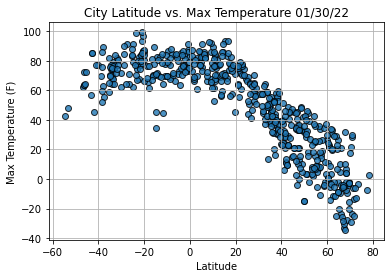

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

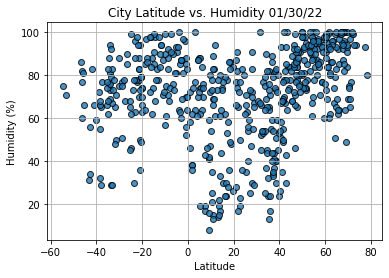

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

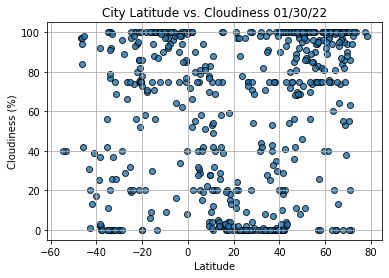

In [16]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

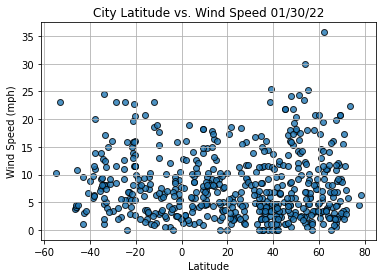

In [17]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()